<a href="https://colab.research.google.com/github/nvasin/StockAdvisor/blob/main/EDAs/IRAO_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = 'IRAO'
data = pd.read_csv(f'{ticker}_moex_10m_data.csv')

In [3]:
# import yfinance as yf


# start_date = '2022-03-01'
# end_date = '2024-11-01'
# data = yf.download('AAPL', start_date, end_date)

## Изучение структуры данных

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
date_range = str(data['Datetime'].dt.date.min()) + ' to ' + str(data['Datetime'].dt.date.max())
date_range

'2021-10-01 to 2024-11-02'

In [5]:
data.set_index('Datetime', inplace = True)

In [6]:
data.head()

,Open,High,Low,Close,Volume,Ticker
Datetime,,,,,,
2021-10-01 09:50:00,4.6480,4.6480,4.6480,4.6480,844600.0,IRAO
2021-10-01 10:00:00,4.6475,4.6770,4.6290,4.6550,40149100.0,IRAO
2021-10-01 10:10:00,4.6565,4.6625,4.6200,4.6515,8463000.0,IRAO
2021-10-01 10:20:00,4.6520,4.6550,4.6445,4.6520,5254900.0,IRAO
2021-10-01 10:30:00,4.6520,4.6590,4.6425,4.6530,4566500.0,IRAO


In [7]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Ticker,0


In [8]:
data.describe()

,Open,High,Low,Close,Volume
count,304395.000000,304395.000000,304395.000000,304395.000000,3.043950e+05
mean,3.834184,3.838480,3.829217,3.834133,1.682082e+06
std,0.532247,0.531568,0.533011,0.532219,3.499909e+06
min,1.422000,1.494000,1.255000,1.422000,1.000000e+02
25%,3.469000,3.472000,3.463000,3.469000,2.866000e+05
50%,3.949500,3.952500,3.945000,3.949500,7.324000e+05
75%,4.202500,4.207500,4.198000,4.202500,1.769800e+06
max,5.140000,5.155000,5.140000,5.140000,1.817363e+08


> Структура данных - OHLC.

> Данные с временным шагом 10 минут.

> За период 01.10.2021 - 02.11.2024.

> Пропуски отсутствуют.

## Первичная визуализация

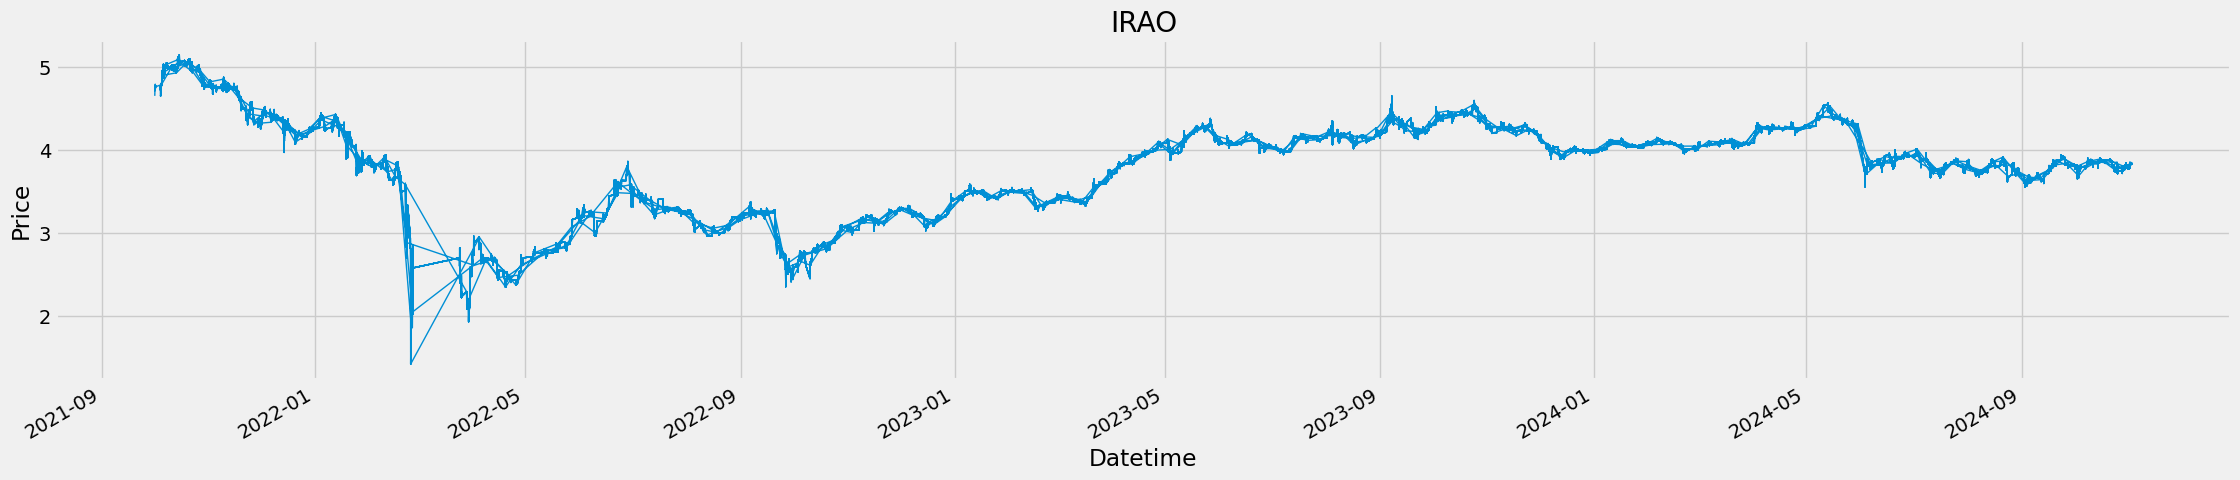

In [11]:
data['Close'].plot()
plt.title(ticker)
plt.ylabel("Price")
plt.rc("figure", figsize=(25,5))
plt.show()

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

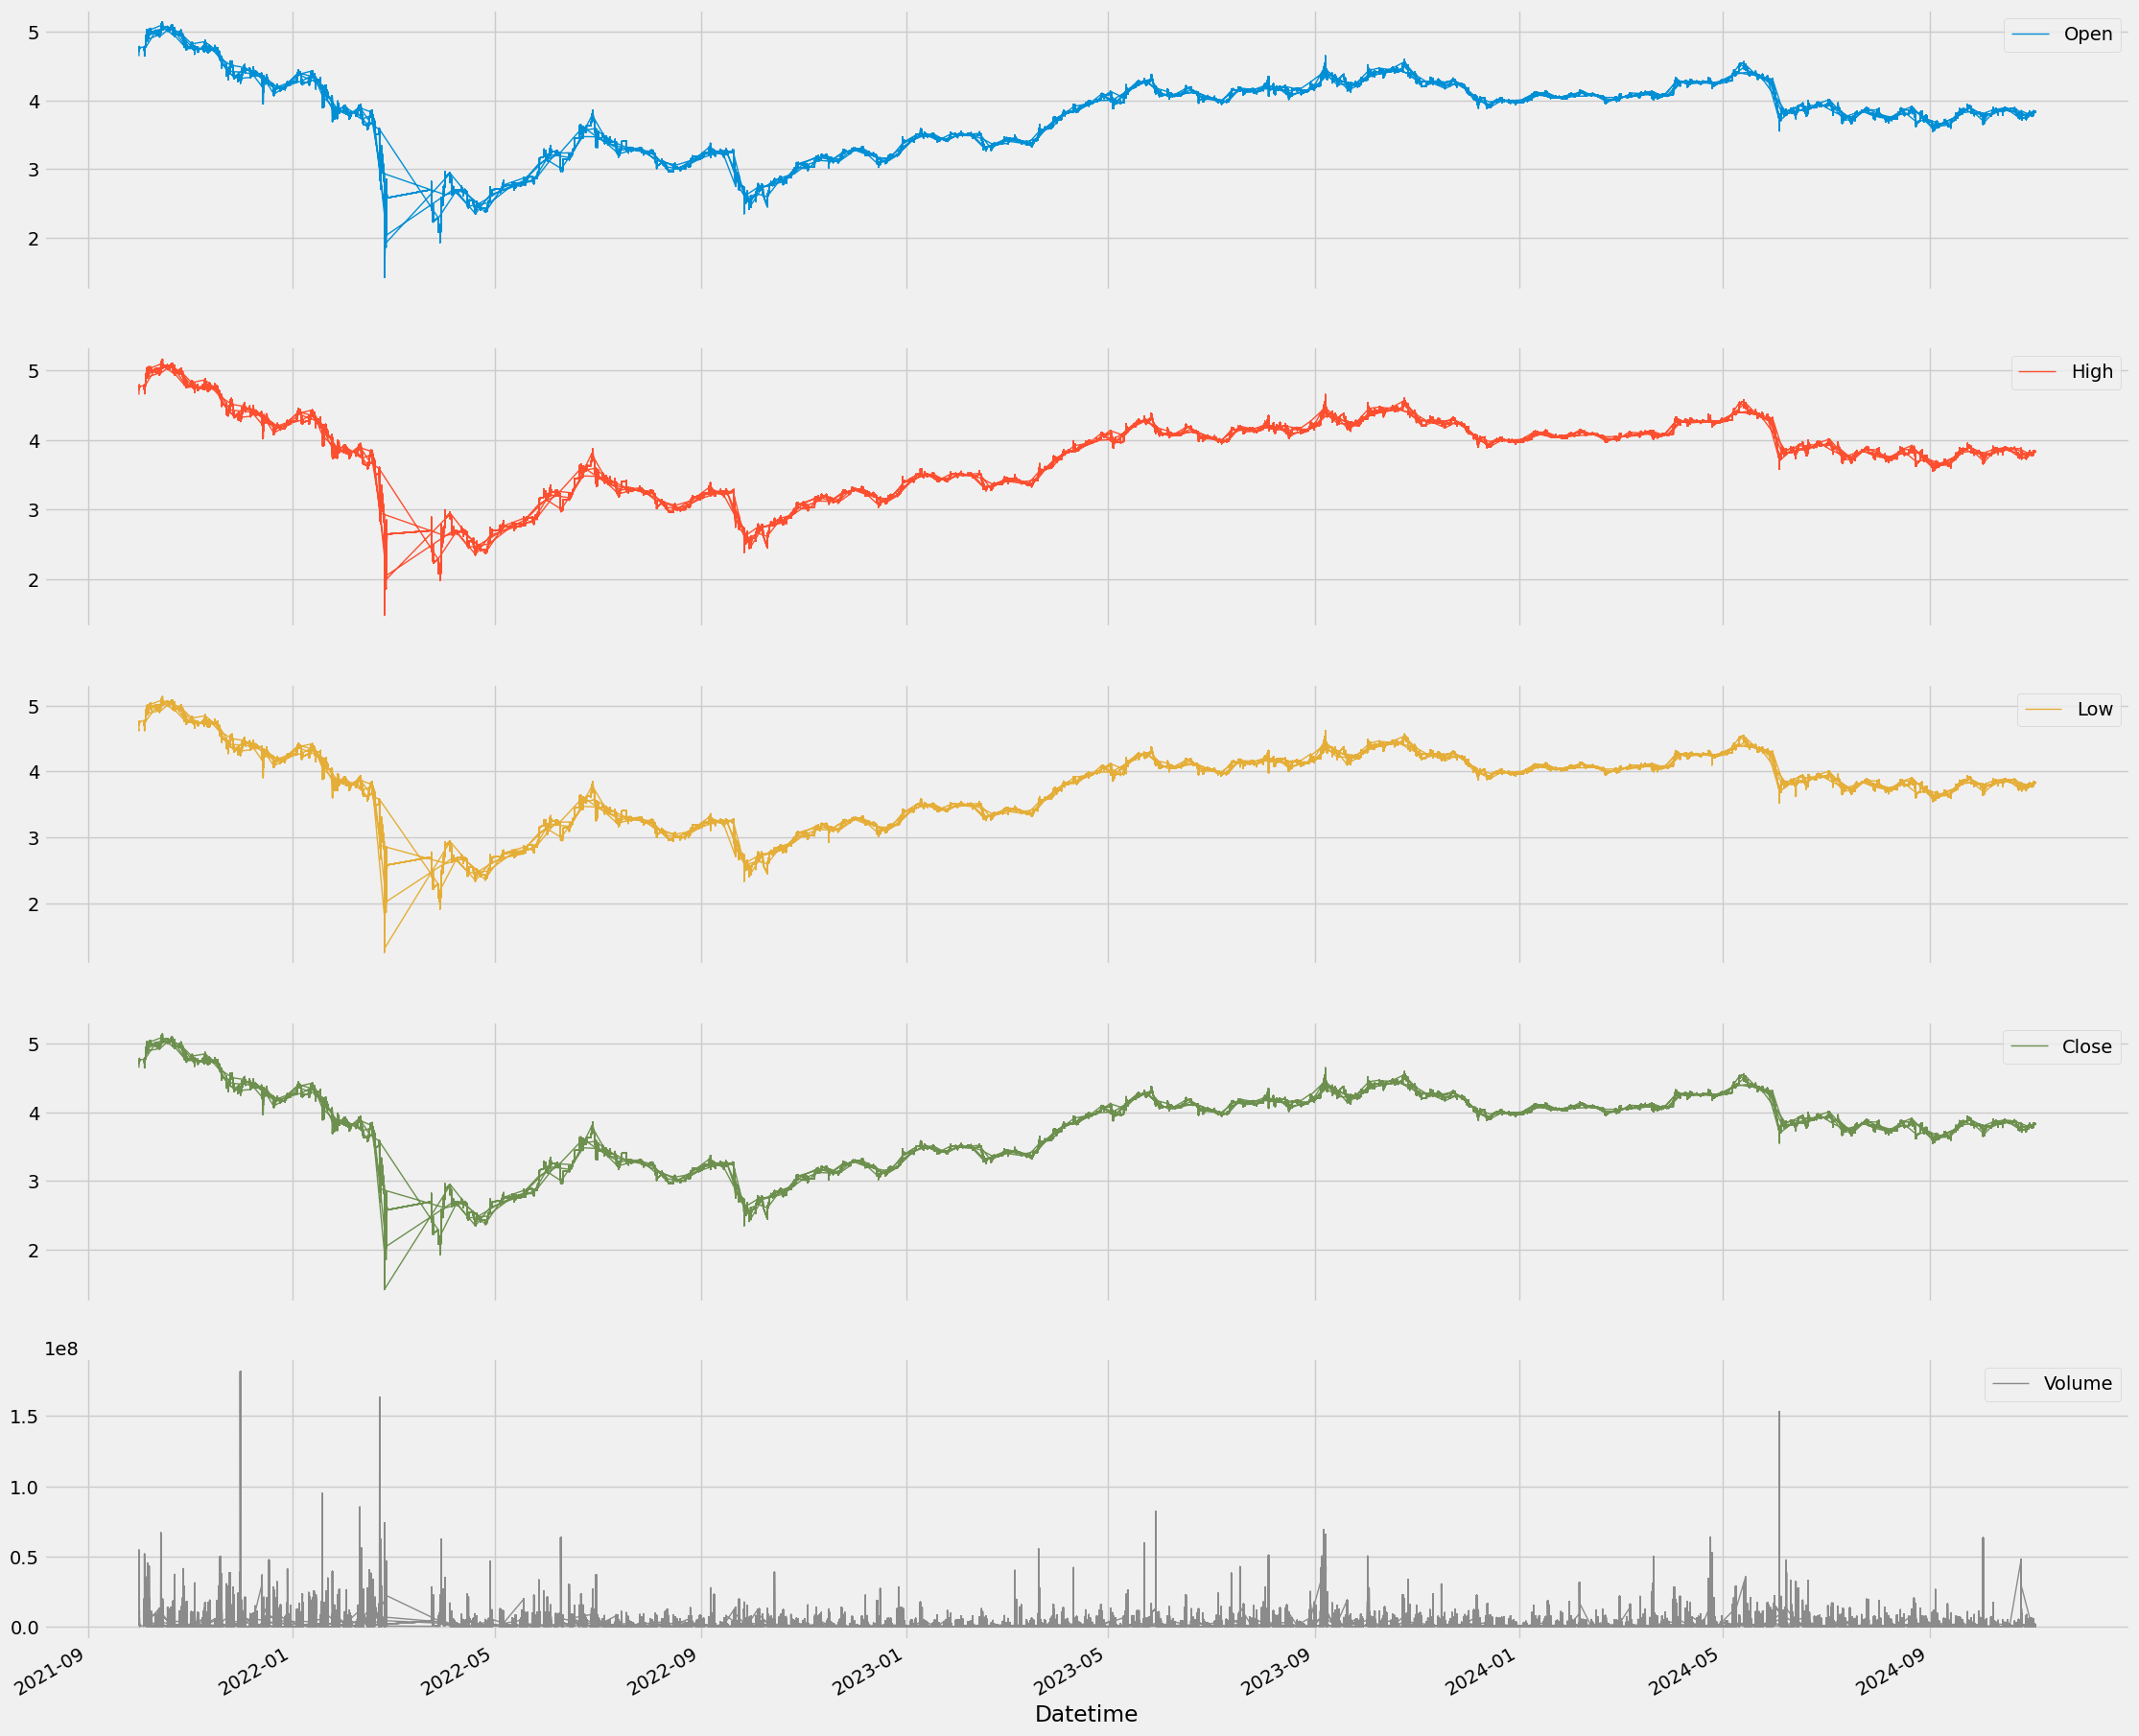

In [12]:
plt.style.use("fivethirtyeight")
plt.rcParams['lines.linewidth'] = 1
data.plot(subplots=True, figsize=(25, 25))

Text(0.5, 1.0, 'Resampled  - Month')

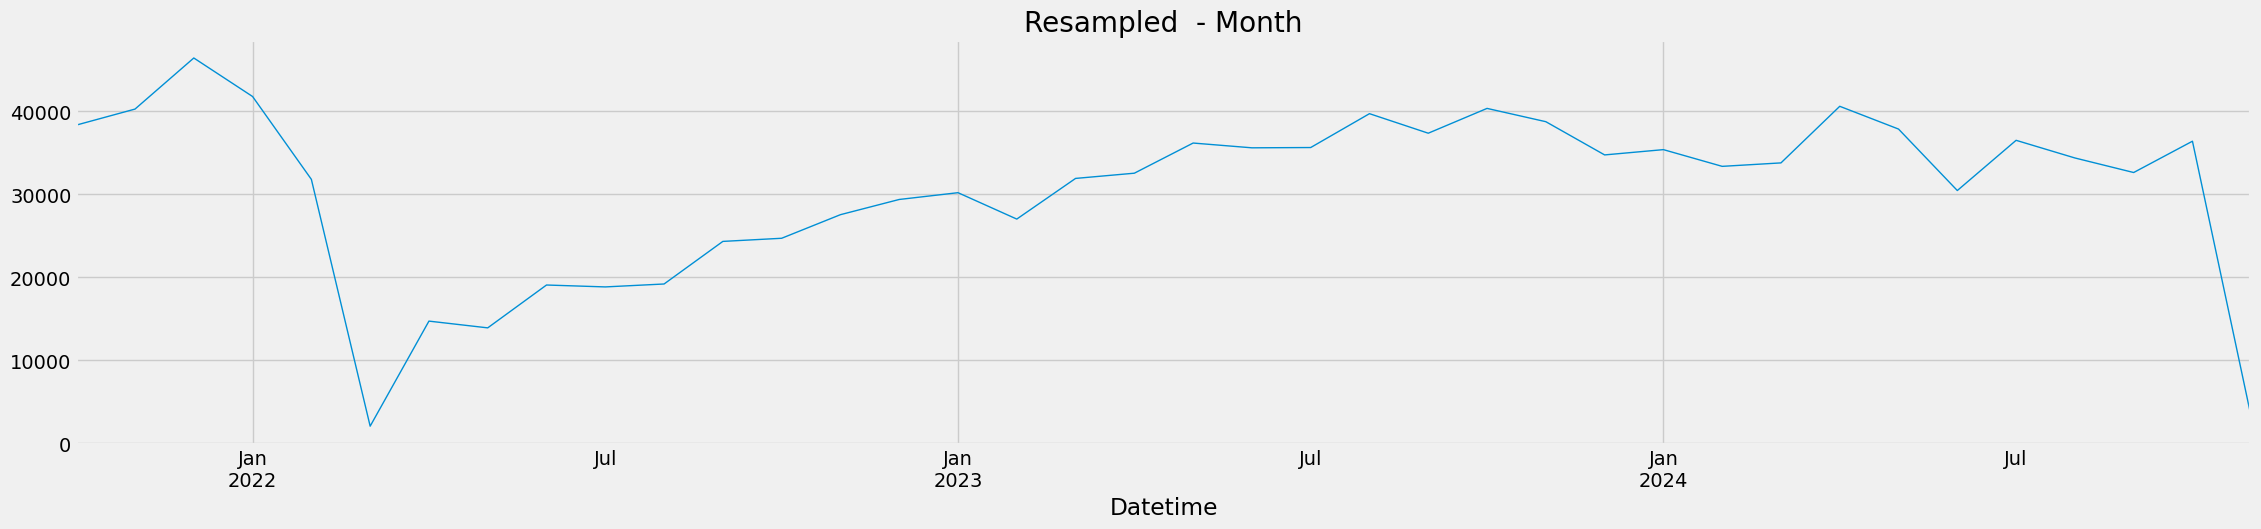

In [13]:
data['Close'].resample("ME").sum().plot()
plt.title('Resampled  - Month')

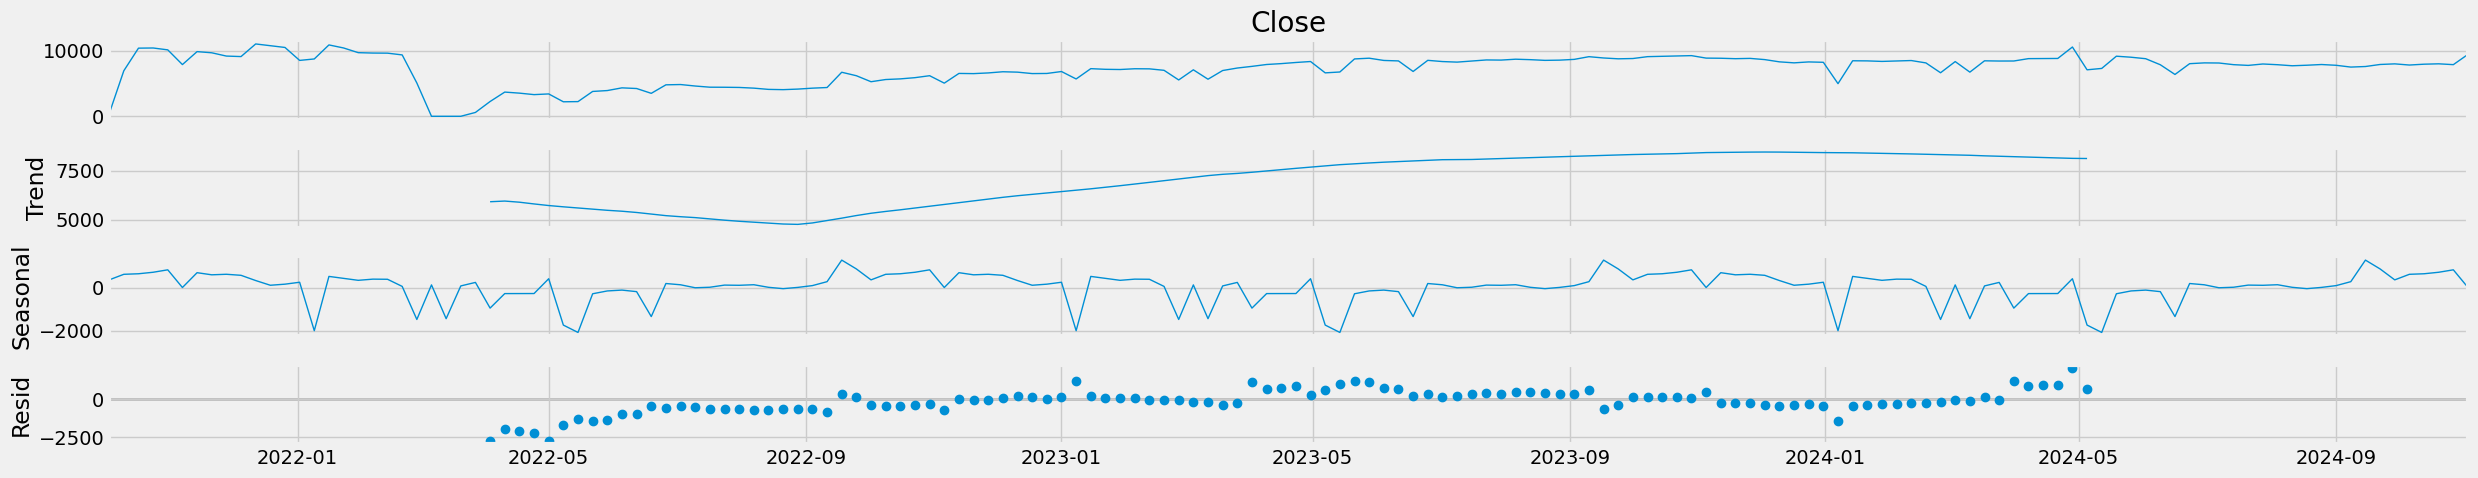

In [14]:
import statsmodels.api as sm


res = sm.tsa.seasonal_decompose(data['Close'].resample("W").sum())
resplot = res.plot()

> Сезонности нет.

## Статистические характеристики

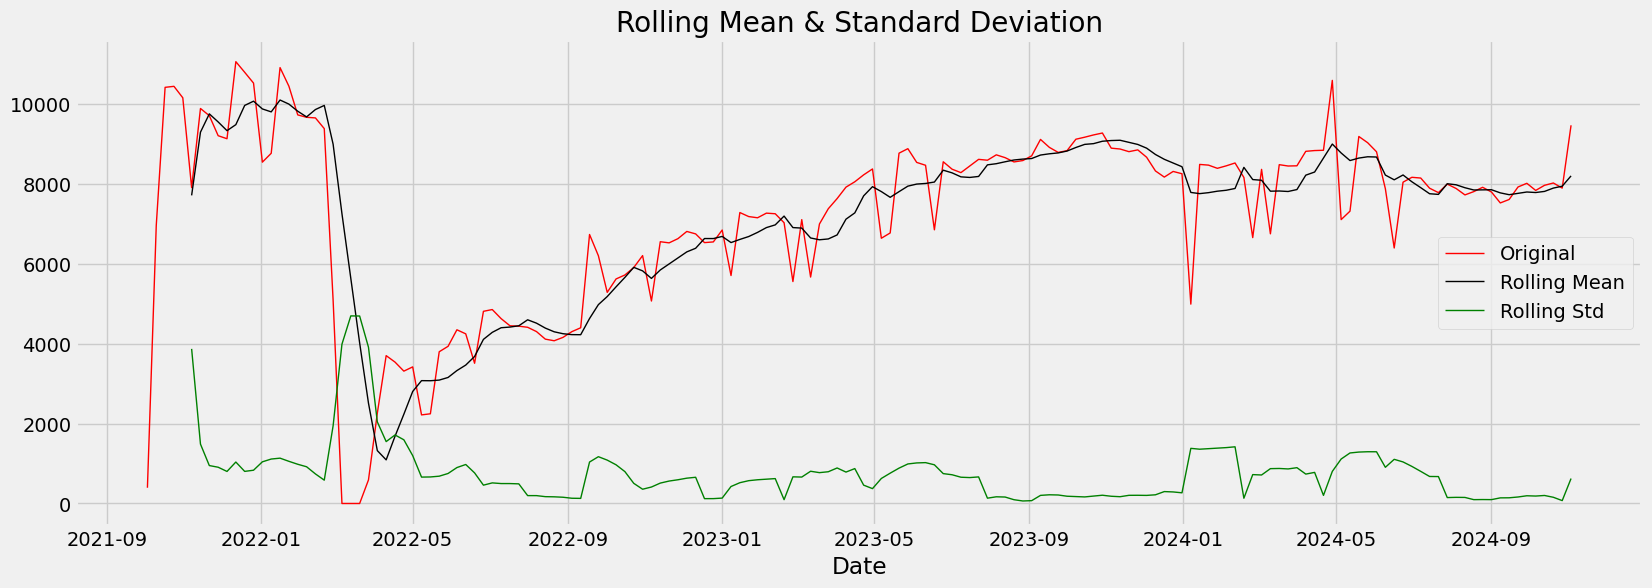

In [15]:
X = data['Close'].resample("W").sum()

rolmean = X.rolling(6).mean()
rolstd = X.rolling(6).std()

plt.figure(figsize=(18,6))
orig = plt.plot(X, color='red',label='Original')
mean = plt.plot(rolmean, color='black', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.xlabel("Date")
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

> Нестационарный временной ряд.

## Специальные тесты TS

ADF

In [16]:
from statsmodels.tsa.stattools import adfuller


X = data['Close'].resample("W").sum().values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.122467
p-value: 0.000889


ACF

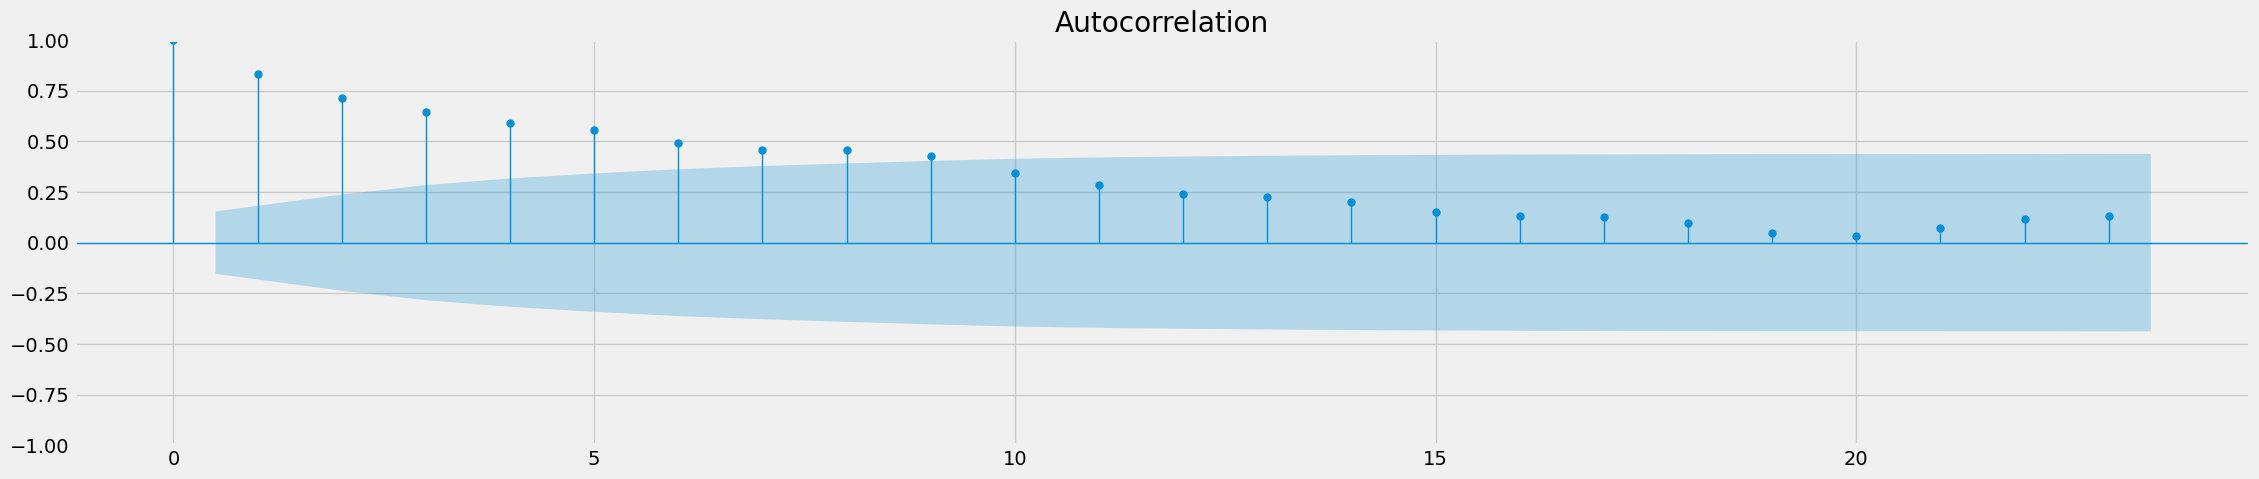

In [17]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(X)
plt.show()

PACF

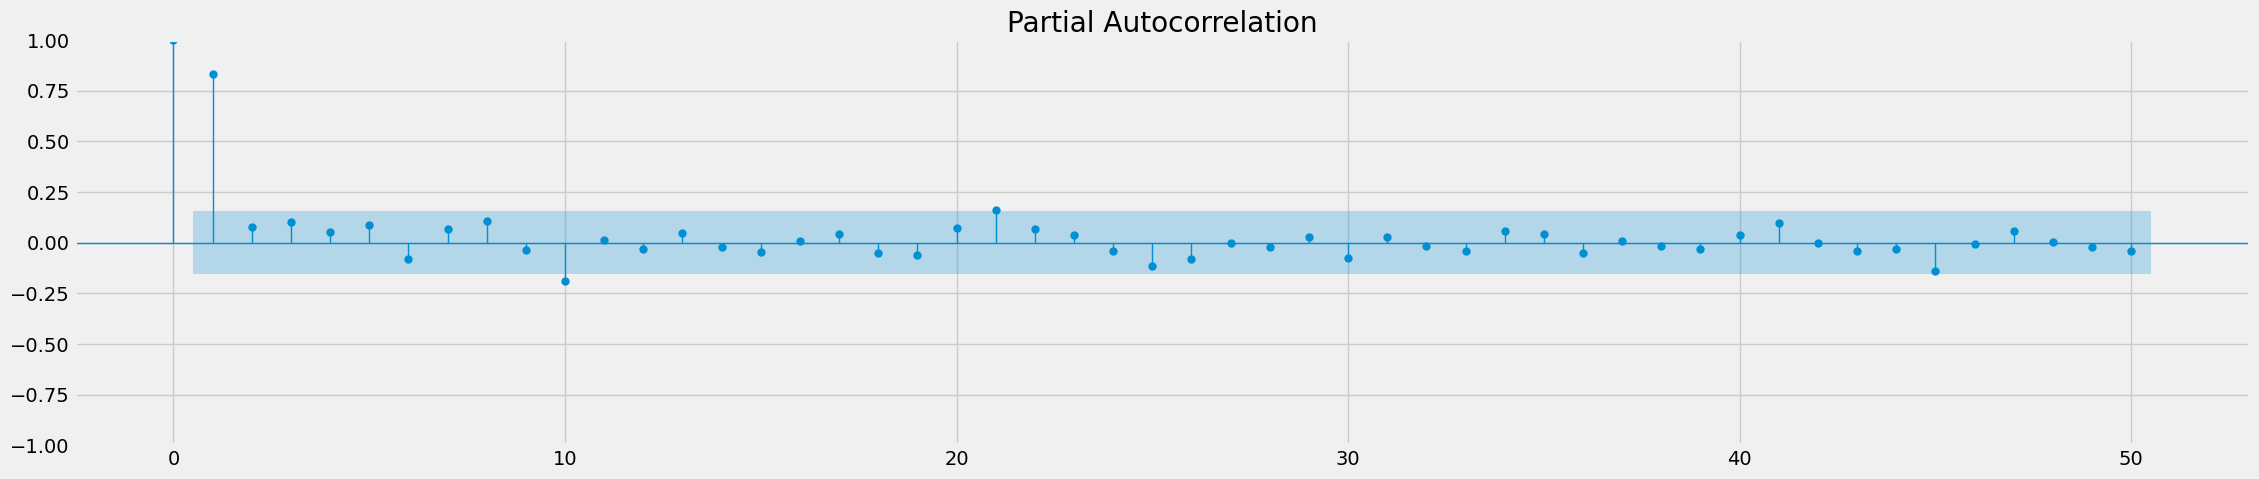

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(X, lags=50)
plt.show()

## Дополнительно

In [19]:
data_2 = data.copy()

In [20]:
data_2['year'] = [x for x in data_2.index.year]
data_2['month'] = [x for x in data_2.index.month]
data_2 = data_2.reset_index()
data_2['week'] = data_2['Datetime'].apply(lambda x:x.week)
data_2 = data_2.set_index('Datetime')
data_2['hour'] = [x for x in data_2.index.hour]
data_2['day'] = [x for x in data_2.index.day_of_week]
data_2['day_str'] = [x.strftime('%a') for x in data_2.index]
data_2['year_month'] = [str(x.year) + '_' + str(x.month) for x in data_2.index]

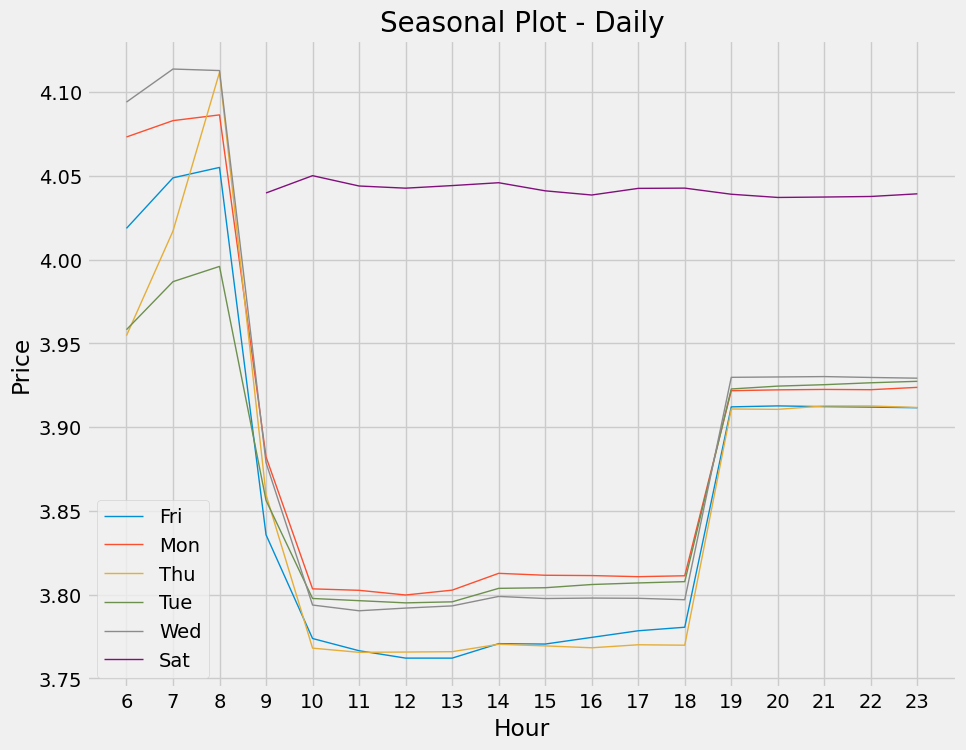

In [21]:
import seaborn as sns


df_plot = data_2[['hour', 'day_str', 'Close']].dropna().groupby(['hour', 'day_str']).mean()[['Close']].reset_index()

plt.figure(figsize=(10,8))
sns.lineplot(data = df_plot, x='hour', y='Close', hue='day_str', legend=True)
plt.locator_params(axis='x', nbins=24)
plt.title("Seasonal Plot - Daily", fontsize=20)
plt.ylabel('Price')
plt.xlabel('Hour')
plt.legend()

Text(0.5, 0, 'Year Month')

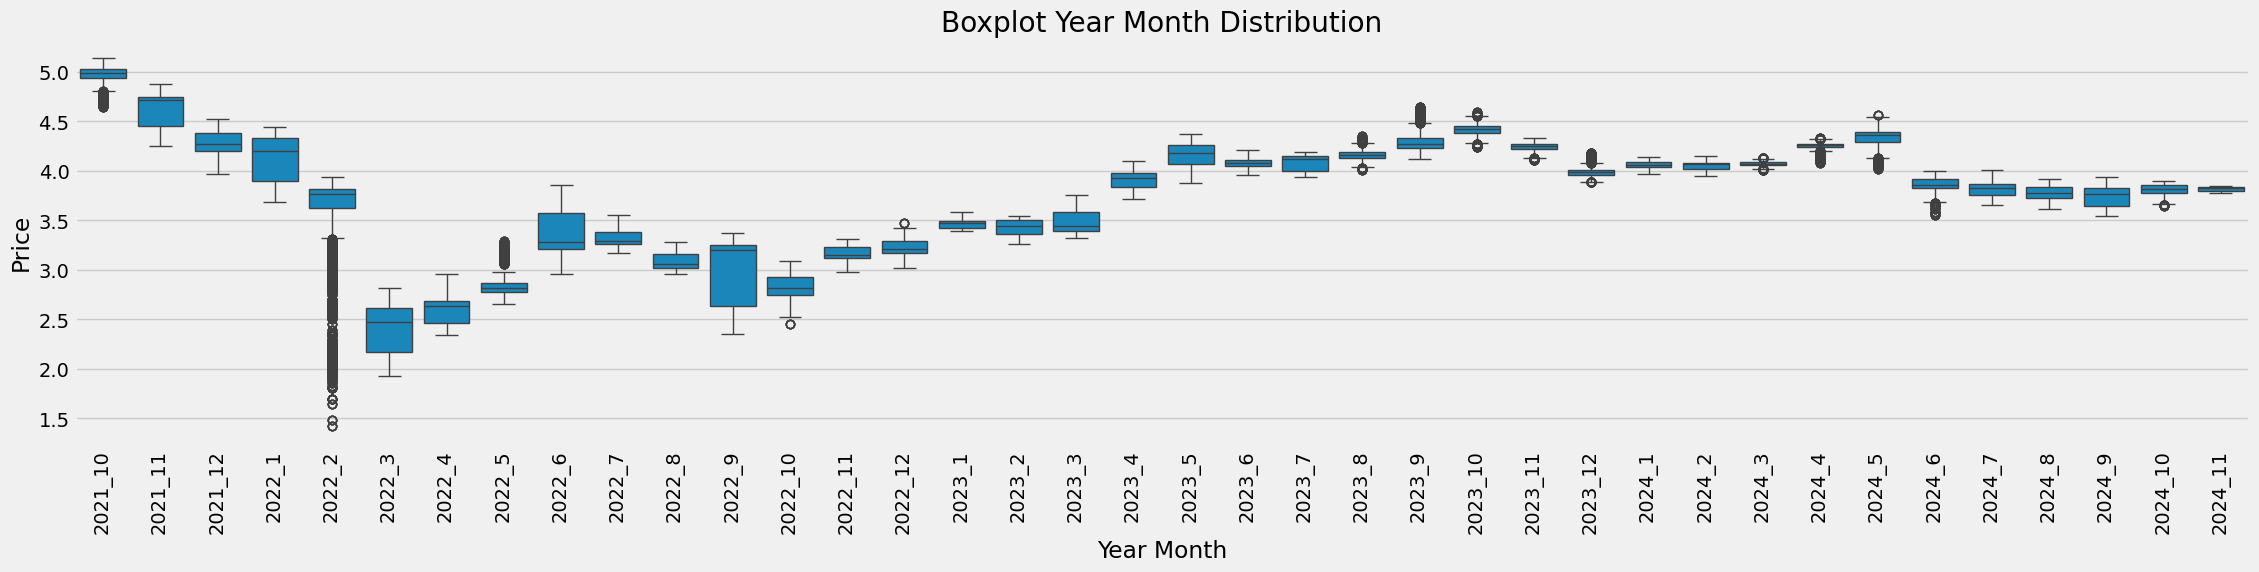

In [22]:
data_2['year'] = [x for x in data_2.index.year]
data_2['month'] = [x for x in data_2.index.month]
data_2['year_month'] = [str(x.year) + '_' + str(x.month) for x in data_2.index]

df_plot = data_2[data_2['year'] >= 2017].reset_index().sort_values(by='Datetime').set_index('Datetime')
plt.title(f'Boxplot Year Month Distribution');
plt.xticks(rotation=90)
plt.xlabel('Year Month')
plt.ylabel('MW')

sns.boxplot(x='year_month', y='Close', data=df_plot)
plt.ylabel('Price')
plt.xlabel('Year Month')